In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensor 
from tensorflow.keras import datasets, layers, models
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist  

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

train_images= train_images[...,tf.newaxis]
test_images = test_images[...,tf.newaxis]

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10,activation='sigmoid'))

In [ ]:
train_images = train_images[6000:]
val_images = train_images[:6000]

In [ ]:
train_labels = train_labels[6000:]
val_labels = train_labels[:6000]

In [ ]:
model.summary()

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
checkpoint_path = '/content/drive/MyDrive/ML/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True,verbose=1)


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Model training
history =  model.fit(train_images, train_labels, validation_data= (val_images,val_labels), epochs=5 )

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1688/1688 [==============================] - 40s 7ms/step - loss: 0.4366 - accuracy: 0.8400 - val_loss: 0.2899 - val_accuracy: 0.8935
Epoch 2/5
1688/1688 [==============================] - 11s 7ms/step - loss: 0.2924 - accuracy: 0.8933 - val_loss: 0.2271 - val_accuracy: 0.9172
Epoch 3/5
1688/1688 [==============================] - 11s 7ms/step - loss: 0.2420 - accuracy: 0.9098 - val_loss: 0.1949 - val_accuracy: 0.9285
Epoch 4/5
1688/1688 [==============================] - 11s 6ms/step - loss: 0.2082 - accuracy: 0.9229 - val_loss: 0.1705 - val_accuracy: 0.9360
Epoch 5/5
1688/1688 [==============================] - 11s 6ms/step - loss: 0.1793 - accuracy: 0.9326 - val_loss: 0.1504 - val_accuracy: 0.9430


<function matplotlib.pyplot.show>

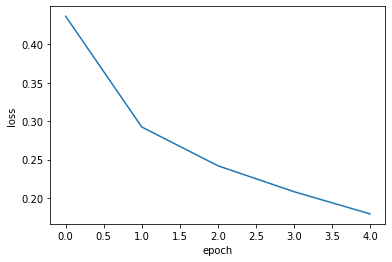

In [ ]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show

<function matplotlib.pyplot.show>

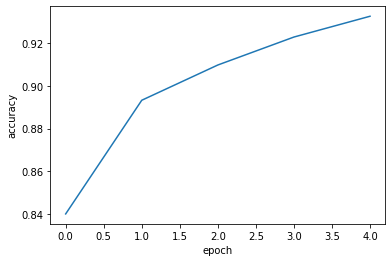

In [ ]:
plt.plot(history.history['accuracy'])
plt.ylabel('accuratijnvcy')
plt.xlabel('epoch')
plt.show

<function matplotlib.pyplot.show>

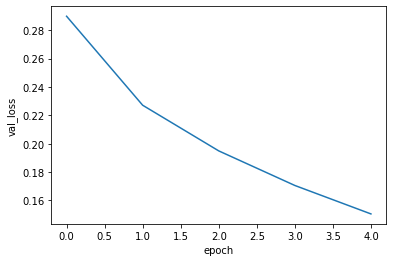

In [ ]:
plt.plot(history.history['val_loss'])
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.show

<function matplotlib.pyplot.show>

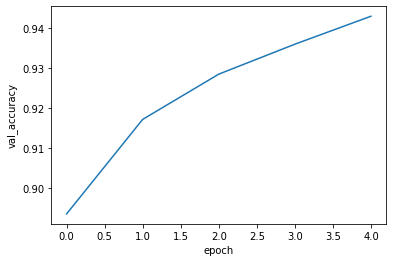

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.show

In [ ]:

model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.2726 - accuracy: 0.9023


[0.27260759472846985, 0.9023000001907349]

In [ ]:
!ls {checkpoint_dir}

In [ ]:
pred = np.argmax(p, axis=1)
print(pred)
print(y_lab[:10])

In [ ]:
for i in range(10):
  plt.imshow(y_test[i], cmap="binary")
  plt.title('Original: {}, Predicted: {}'.format(y_lab[i], pred[i]))
  plt.axis("Off")
  plt.figure()